Chapter 4 Fatigue load analysis and rain-flow cycles
=====================================================

Section 4.3.1 Crossing intensity
--------------------------------


alfa = 0.491212 


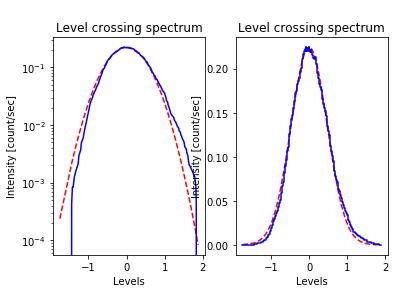

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wafo.data as wd
import wafo.objects as wo

printing=0
xx_sea = wd.sea()  
ts = wo.mat2timeseries(xx_sea)
tp = ts.turning_points()
mM = tp.cycle_pairs(kind='min2max')
lc = mM.level_crossings(intensity=True)
T_sea = ts.args[-1]-ts.args[0]

plt.subplot(1,2,1)
lc.plot()
plt.subplot(1,2,2)
lc.setplotter(plotmethod='step')
lc.plot()

 
 
m_sea = ts.data.mean() 
f0_sea = np.interp(m_sea, lc.args,lc.data)
extr_sea = len(tp.data)/(2*T_sea)
alfa_sea = f0_sea/extr_sea
print('alfa = %g ' % alfa_sea )

Section 4.3.2 Extraction of rainflow cycles
-------------------------------------------
Min-max and rainflow cycle plots
---------------------------------

Text(0.5, 1.0, 'Rainflow filtered cycles')

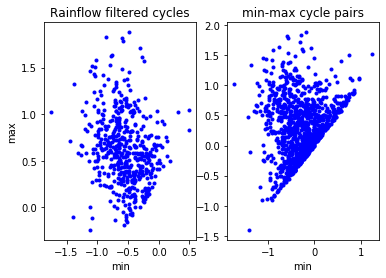

In [3]:
mM_rfc = tp.cycle_pairs(h=0.3)
 

plt.subplot(122), 
mM.plot() 
plt.title('min-max cycle pairs')
plt.subplot(121), 
mM_rfc.plot()
plt.title('Rainflow filtered cycles')


Min-max and rainflow cycle distributions
-------------------------------------------

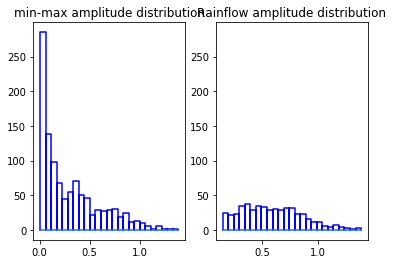

In [5]:
import wafo.misc as wm
ampmM_sea = mM.amplitudes()
ampRFC_sea = mM_rfc.amplitudes()

plt.subplot(121) 
wm.plot_histgrm(ampmM_sea,25)
ylim = plt.gca().get_ylim()
plt.title('min-max amplitude distribution')
plt.subplot(122)
wm.plot_histgrm(ampRFC_sea,25)
plt.gca().set_ylim(ylim)
_=plt.title('Rainflow amplitude distribution')


In [10]:
#!#! Section 4.3.3 Simulation of rainflow cycles
#!#! Simulation of cycles in a Markov model
import wafo.markov as wmv
n=41; param_m=[-1, 1, n]; param_D=[1, n, n];
u_markov=np.linspace(*param_m);
G_markov=wmv.mktestmat(param_m,[-0.2, 0.2],0.15,1);
T_markov=5000;
#xxD_markov=mctpsim({G_markov [,]},T_markov);
#xx_markov=[(1:T_markov)' u_markov(xxD_markov)'];
#clf
#plot(xx_markov(1:50,1),xx_markov(1:50,2))
#title('Markov chain of turning points')
#wafostamp([],'(ER)')
#disp('Block 5'),pause(pstate)
#
#
##!#! Rainflow cycles in a transformed Gaussian model
##!#! Hermite transformed wave data and rainflow filtered turning points, h = 0.2.
#me = mean(xx_sea(:,2));
#sa = std(xx_sea(:,2));
#Hm0_sea = 4*sa;
#Tp_sea = 1/max(lc_sea(:,2));
#spec = jonswap([],[Hm0_sea Tp_sea]);
#
#[sk, ku] = spec2skew(spec);
#spec.tr = hermitetr([],[sa sk ku me]);
#param_h = [-1.5 2 51];
#spec_norm = spec;
#spec_norm.S = spec_norm.S/sa^2;
#xx_herm = spec2sdat(spec_norm,[2^15 1],0.1);
##! ????? PJ, JR 11-Apr-2001
##! NOTE, in the simulation program spec2sdat
##!the spectrum must be normalized to variance 1 
##! ?????
#h = 0.2;
#[dtp,u_herm,xx_herm_1]=dat2dtp(param_h,xx_herm,h);
#clf
#plot(xx_herm(:,1),xx_herm(:,2),'k','LineWidth',2); hold on;
#plot(xx_herm_1(:,1),xx_herm_1(:,2),'k--','Linewidth',2);
#axis([0 50 -1 1]), hold off;
#title('Rainflow filtered wave data')
#wafostamp([],'(ER)')
#disp('Block 6'),pause(pstate)
#
##!#! Rainflow cycles and rainflow filtered rainflow cycles in the transformed Gaussian process.
#tp_herm=dat2tp(xx_herm);
#RFC_herm=tp2rfc(tp_herm);
#mM_herm=tp2mm(tp_herm);
#h=0.2;
#[dtp,u,tp_herm_1]=dat2dtp(param_h,xx_herm,h);
#RFC_herm_1 = tp2rfc(tp_herm_1);
#clf
#subplot(121), ccplot(RFC_herm)
#title('h=0')
#subplot(122), ccplot(RFC_herm_1)
#title('h=0.2')
#if (printing==1), print -deps ../bilder/fatigue_8.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 7'),pause(pstate)
#
##!#! Section 4.3.4 Calculating the rainflow matrix
#
#
#Grfc_markov=mctp2rfm({G_markov []});
#clf
#subplot(121), cmatplot(u_markov,u_markov,G_markov), axis('square')
#subplot(122), cmatplot(u_markov,u_markov,Grfc_markov), axis('square')
#wafostamp([],'(ER)')
#disp('Block 8'),pause(pstate)
#
##!#! 
#clf
#cmatplot(u_markov,u_markov,{G_markov Grfc_markov},3) 
#wafostamp([],'(ER)')
#disp('Block 9'),pause(pstate)	
#
##!#! Min-max-matrix and theoretical rainflow matrix for test Markov sequence.
#cmatplot(u_markov,u_markov,{G_markov Grfc_markov},4)
#subplot(121), axis('square'), title('min2max transition matrix')
#subplot(122), axis('square'), title('Rainflow matrix')
#if (printing==1), print -deps ../bilder/fatigue_9.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 10'),pause(pstate)
#
##!#! Observed and theoretical rainflow matrix for test Markov sequence.
#n=length(u_markov);
#Frfc_markov=dtp2rfm(xxD_markov,n);
#clf
#cmatplot(u_markov,u_markov,{Frfc_markov Grfc_markov*T_markov/2},3) 
#subplot(121), axis('square'), title('Observed rainflow matrix')
#subplot(122), axis('square'), title('Theoretical rainflow matrix')
#if (printing==1), print -deps ../bilder/fatigue_10.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 11'),pause(pstate)
#
##!#! Smoothed observed and calculated rainflow matrix for test Markov sequence.
#tp_markov=dat2tp(xx_markov);
#RFC_markov=tp2rfc(tp_markov);
#h=1;
#Frfc_markov_smooth=cc2cmat(param_m,RFC_markov,[],1,h);
#clf
#cmatplot(u_markov,u_markov,{Frfc_markov_smooth Grfc_markov*T_markov/2},4)
#subplot(121), axis('square'), title('Smoothed observed rainflow matrix')
#subplot(122), axis('square'), title('Theoretical rainflow matrix')
#if (printing==1), print -deps ../bilder/fatigue_11.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 12'),pause(pstate)
#
##!#! Rainflow matrix from spectrum
#clf
##!GmM3_herm=spec2mmtpdf(spec,[],'Mm',[],[],2);
#GmM3_herm=spec2cmat(spec,[],'Mm',[],param_h,2);
#pdfplot(GmM3_herm)
#wafostamp([],'(ER)')
#disp('Block 13'),pause(pstate)
#
#
##!#! Min-max matrix and theoretical rainflow matrix for Hermite-transformed Gaussian waves.
#Grfc_herm=mctp2rfm({GmM3_herm.f []});
#u_herm=levels(param_h);
#clf
#cmatplot(u_herm,u_herm,{GmM3_herm.f Grfc_herm},4)
#subplot(121), axis('square'), title('min-max matrix')
#subplot(122), axis('square'), title('Theoretical rainflow matrix')
#if (printing==1), print -deps ../bilder/fatigue_12.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 14'),pause(pstate)
#
##!#!
#clf
#Grfc_direct_herm=spec2cmat(spec,[],'rfc',[],[],2);
#subplot(121), pdfplot(GmM3_herm), axis('square'), hold on
#subplot(122), pdfplot(Grfc_direct_herm), axis('square'), hold off
#if (printing==1), print -deps ../bilder/fig_mmrfcjfr.eps
#end
#wafostamp([],'(ER)')
#disp('Block 15'),pause(pstate)
#
#
##!#! Observed smoothed and theoretical min-max matrix, 
##!#! (and observed smoothed and theoretical rainflow matrix for Hermite-transformed Gaussian waves).
#tp_herm=dat2tp(xx_herm);
#RFC_herm=tp2rfc(tp_herm);
#mM_herm=tp2mm(tp_herm);
#h=0.2;
#FmM_herm_smooth=cc2cmat(param_h,mM_herm,[],1,h);
#Frfc_herm_smooth=cc2cmat(param_h,RFC_herm,[],1,h);
#T_herm=xx_herm(end,1)-xx_herm(1,1);
#clf
#cmatplot(u_herm,u_herm,{FmM_herm_smooth GmM3_herm.f*length(mM_herm) ; ...
#      Frfc_herm_smooth Grfc_herm*length(RFC_herm)},4)
#subplot(221), axis('square'), title('Observed smoothed min-max matrix')
#subplot(222), axis('square'), title('Theoretical min-max matrix')
#subplot(223), axis('square'), title('Observed smoothed rainflow matrix')
#subplot(224), axis('square'), title('Theoretical rainflow matrix')
#if (printing==1), print -deps ../bilder/fatigue_13.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 16'),pause(pstate)
#   
##!#! Section 4.3.5 Simulation from crossings and rainflow structure
#
##!#! Crossing spectrum (smooth curve) and obtained spectrum (wiggled curve)
##!#! for simulated process with irregularity factor 0.25.
#clf
#cross_herm=dat2lc(xx_herm);
#alpha1=0.25;
#alpha2=0.75;
#xx_herm_sim1=lc2sdat(cross_herm,500,alpha1);
#cross_herm_sim1=dat2lc(xx_herm_sim1);
#subplot(211)
#plot(cross_herm(:,1),cross_herm(:,2)/max(cross_herm(:,2)))
#hold on
#stairs(cross_herm_sim1(:,1),...
#    cross_herm_sim1(:,2)/max(cross_herm_sim1(:,2)))
#hold off
#title('Crossing intensity, \alpha = 0.25')
#subplot(212)
#plot(xx_herm_sim1(:,1),xx_herm_sim1(:,2))
#title('Simulated load, \alpha = 0.25')
#if (printing==1), print -deps ../bilder/fatigue_14_25.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 16'),pause(pstate)
#
##!#! Crossing spectrum (smooth curve) and obtained spectrum (wiggled curve)
##!#! for simulated process with irregularity factor 0.75.
#xx_herm_sim2=lc2sdat(cross_herm,500,alpha2);
#cross_herm_sim2=dat2lc(xx_herm_sim2);
#subplot(211)
#plot(cross_herm(:,1),cross_herm(:,2)/max(cross_herm(:,2)))
#hold on
#stairs(cross_herm_sim2(:,1),...
#    cross_herm_sim2(:,2)/max(cross_herm_sim2(:,2)))
#hold off
#title('Crossing intensity, \alpha = 0.75')
#subplot(212)
#plot(xx_herm_sim2(:,1),xx_herm_sim2(:,2))
#title('Simulated load, \alpha = 0.75')
#if (printing==1), print -deps ../bilder/fatigue_14_75.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 17'),pause(pstate)
#
##!#! Section 4.4 Fatigue damage and fatigue life distribution
##!#! Section 4.4.1 Introduction
#beta=3.2; gam=5.5E-10; T_sea=xx_sea(end,1)-xx_sea(1,1);
#d_beta=cc2dam(RFC_sea,beta)/T_sea;
#time_fail=1/gam/d_beta/3600      #!in hours of the specific storm
#disp('Block 18'),pause(pstate)
#
##!#! Section 4.4.2 Level crossings
##!#! Crossing intensity as calculated from the Markov matrix (solid curve) and from the observed rainflow matrix (dashed curve).
#clf
#mu_markov=cmat2lc(param_m,Grfc_markov);
#muObs_markov=cmat2lc(param_m,Frfc_markov/(T_markov/2));
#clf
#plot(mu_markov(:,1),mu_markov(:,2),muObs_markov(:,1),muObs_markov(:,2),'--')
#title('Theoretical and observed crossing intensity ')
#if (printing==1), print -deps ../bilder/fatigue_15.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 19'),pause(pstate)
#
##!#! Section 4.4.3 Damage
##!#! Distribution of damage from different RFC cycles, from calculated theoretical and from observed rainflow matrix.
#beta = 4;
#Dam_markov = cmat2dam(param_m,Grfc_markov,beta)
#DamObs1_markov = cc2dam(RFC_markov,beta)/(T_markov/2)
#DamObs2_markov = cmat2dam(param_m,Frfc_markov,beta)/(T_markov/2)
#disp('Block 20'),pause(pstate)
#
#Dmat_markov = cmat2dmat(param_m,Grfc_markov,beta);
#DmatObs_markov = cmat2dmat(param_m,Frfc_markov,beta)/(T_markov/2); 
#clf
#subplot(121), cmatplot(u_markov,u_markov,Dmat_markov,4)
#title('Theoretical damage matrix') 
#subplot(122), cmatplot(u_markov,u_markov,DmatObs_markov,4)
#title('Observed damage matrix') 
#if (printing==1), print -deps ../bilder/fatigue_16.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 21'),pause(pstate)
#
#
##!#!
##!Damplus_markov = lc2dplus(mu_markov,beta)
#pause(pstate)
#
##!#! Section 4.4.4 Estimation of S-N curve
#
##!#! Load SN-data and plot in log-log scale.
#SN = load('sn.dat');
#s = SN(:,1);
#N = SN(:,2);
#clf
#loglog(N,s,'o'), axis([0 14e5 10 30])
##!if (printing==1), print -deps ../bilder/fatigue_?.eps end
#wafostamp([],'(ER)')
#disp('Block 22'),pause(pstate)
#
#
##!#! Check of S-N-model on normal probability paper.
#
#normplot(reshape(log(N),8,5))
#if (printing==1), print -deps ../bilder/fatigue_17.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 23'),pause(pstate)
#
##!#! Estimation of S-N-model on linear  scale.
#clf
#[e0,beta0,s20] = snplot(s,N,12);
#title('S-N-data with estimated N(s)','FontSize',20)
#set(gca,'FontSize',20)
#if (printing==1), print -deps ../bilder/fatigue_18a.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 24'),pause(pstate)
#
##!#! Estimation of S-N-model on log-log scale.
#clf
#[e0,beta0,s20] = snplot(s,N,14);
#title('S-N-data with estimated N(s)','FontSize',20)
#set(gca,'FontSize',20)
#if (printing==1), print -deps ../bilder/fatigue_18b.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 25'),pause(pstate)
#
##!#! Section 4.4.5 From S-N curve to fatigue life distribution
##!#! Damage intensity as function of $\beta$
#beta = 3:0.1:8;
#DRFC = cc2dam(RFC_sea,beta);
#dRFC = DRFC/T_sea;
#plot(beta,dRFC), axis([3 8 0 0.25])
#title('Damage intensity as function of \beta')
#if (printing==1), print -deps ../bilder/fatigue_19.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 26'),pause(pstate)
#
##!#! Fatigue life distribution with sea load.
#dam0 = cc2dam(RFC_sea,beta0)/T_sea;
#[t0,F0] = ftf(e0,dam0,s20,0.5,1);
#[t1,F1] = ftf(e0,dam0,s20,0,1);
#[t2,F2] = ftf(e0,dam0,s20,5,1);
#plot(t0,F0,t1,F1,t2,F2)
#title('Fatigue life distribution function')
#if (printing==1), print -deps ../bilder/fatigue_20.eps 
#end
#wafostamp([],'(ER)')
#disp('Block 27, last block')